In [73]:
import os
from glob import glob

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [116]:
BATCH_SIZE = 32
AUTO = tf.data.experimental.AUTOTUNE

EPOCHS = 50
IMG_SIZE = (384, 384)

CLASS_NAMES = ["perro", "gato"]

In [117]:
dog_folder_train = glob('../Data/**/perros/train/*',recursive = True)
cat_folder_train = glob('../Data/**/gatos/train/*',recursive = True)


dog_folder_val = glob('../Data/**/perros/val/*',recursive = True)
cat_folder_val = glob('../Data/**/gatos/val/*',recursive = True)


train =  dog_folder_train + cat_folder_train
val = dog_folder_val + cat_folder_val

In [118]:
train_list = tf.data.Dataset.list_files(train)
val_list = tf.data.Dataset.list_files(val)

In [123]:
def process_path(path):
    if tf.strings.regex_full_match(path, ".*gato.*"):
        label = 1
    else:
        label = 0
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, IMG_SIZE, method="bicubic", antialias=True)
    return img, label

In [124]:
train = train_list.map(process_path, num_parallel_calls=AUTO).batch(BATCH_SIZE).prefetch(AUTO)
val = val_list.map(process_path, num_parallel_calls=AUTO).batch(BATCH_SIZE).prefetch(AUTO)

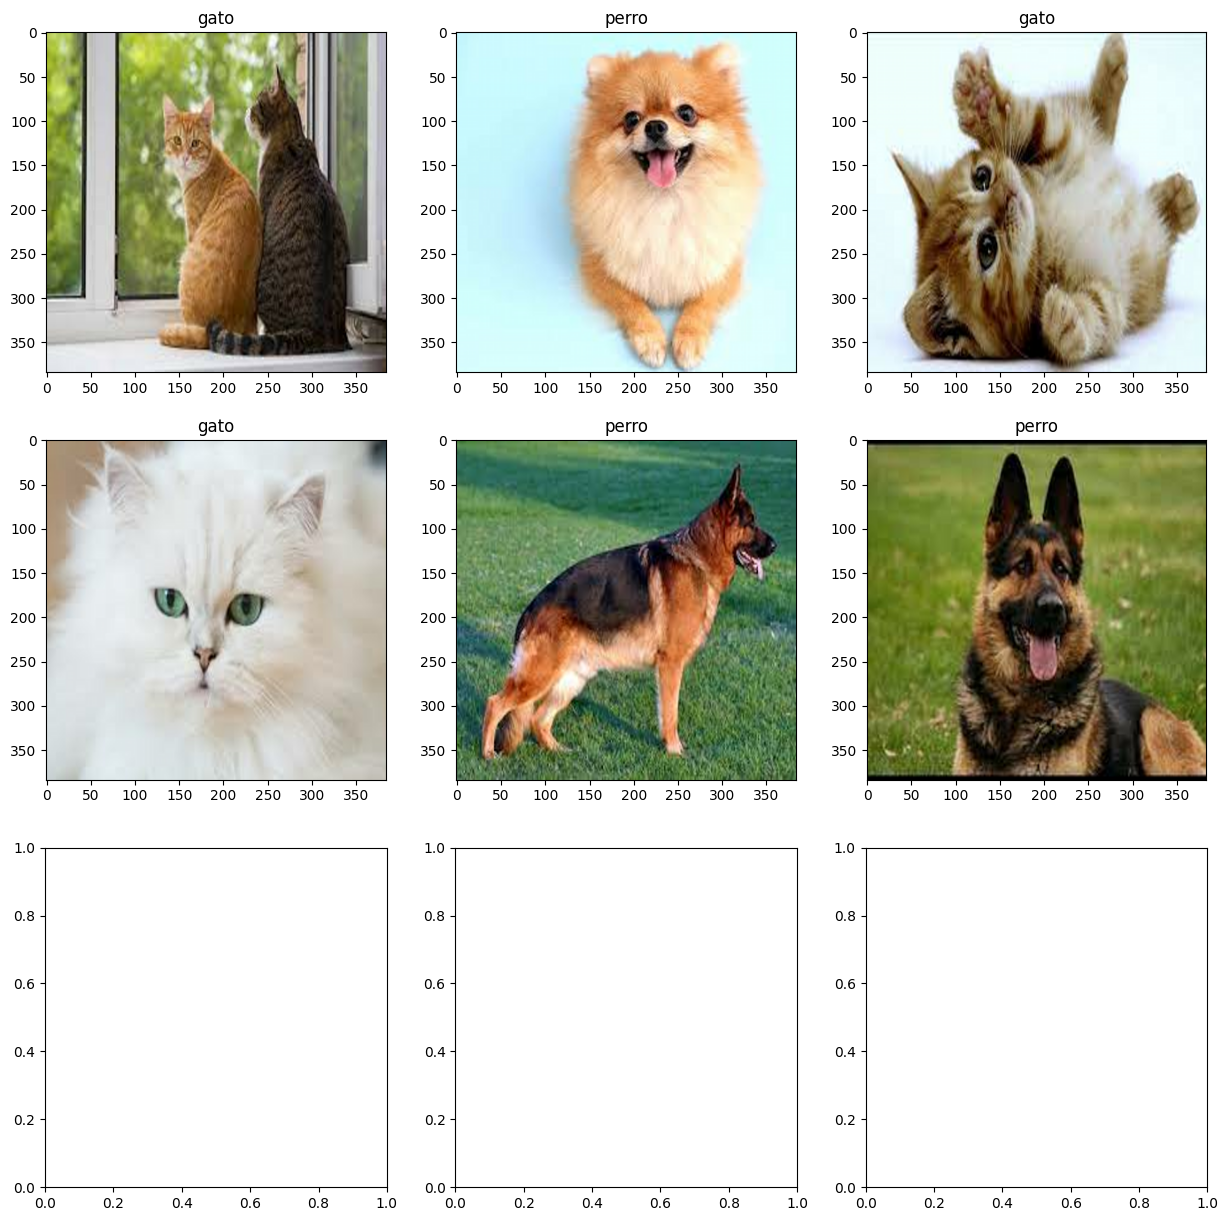

In [130]:
b = next(iter(train))
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

idxs = range(0,6)

for i, idx in enumerate(idxs):
    label = CLASS_NAMES[b[1][idx]]
    axs[i//3, i%3].imshow(b[0][idx].numpy().astype(int).clip(0, 255))
    axs[i//3, i%3].set_title(label)